In [1]:
import pandas as pd
import glob
import json
import ntpath
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%config InlineBackend.figure_format = 'retina'

In [158]:
df = pd.read_csv("chodakowska-comments.csv")
df.dropna(inplace=True)
df.ts = pd.to_datetime(df.ts)
df.spam = df.spam.astype('bool')
df.owner_verified = df.owner_verified.astype('bool')
df.viewer_has_liked = df.viewer_has_liked.astype('bool')
df.like_count = df.like_count.astype('int')
df.comments_threads.fillna(0, inplace=True)
df.comments_threads = df.comments_threads.astype('int')

/Users/marian/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,5,6,7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [159]:
df.shape

(1354457, 10)

In [160]:
df.sample(n=5)

short_code                 id  \
1272173  CCG4F4OnYX4  17844497105258058   
1288449  CCgCdDanrCq  17853821819114051   
562688   BVhgbq6FIWQ  17885648287055786   
757697   BgeiF00lJ_X  17859439393228307   
777948    BhgLqdfFQI  17918754868088099   

                                                      text  \
1272173  Zaliczone i jest ,,MOC". A po ledwo, ledwo by≈Ç...   
1288449  Jestem ‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è, staram siƒô. Te lajfy sƒÖ SUPER!!...   
562688                                     Ja r√≥wnie≈º mamüòç   
757697     @chodakowskaewa a gdzie treningi na next week üôà   
777948   Wielkie wow i ogromne brawa! To sie nazywa sam...   

                         ts           owner  owner_verified  viewer_has_liked  \
1272173 2020-07-01 21:19:12     katy.jakuza           False             False   
1288449 2020-07-11 20:31:36  tynkairodzinka           False             False   
562688  2017-06-20 09:50:43      lady_marsi           False             False   
757697  2018-03-18 21:54:57     olga_.zajac           False             False   
777948  2018-04-13 10:28:24      szarlotaaa           False             False   

         like_count  comments_threads   spam  
1272173           0                 0  False  
1288449           0                 0  False  
562688            0                 0  False  
757697            0                 0  False  
777948            0                 0  False

## TOP20 komentujƒÖcych

In [161]:
df.groupby('owner').size().sort_values(ascending=False).head(20).to_frame()

0
owner                             
chodakowskaewa                7947
julk_a17                      2141
agaa.d                        2086
magdalena.leonczak            2007
tinaa_trenuje                 1793
ewelinapee                    1632
_beata_koktajlowa_dziewczyna  1555
helenaroszak                  1552
sikorka470                    1508
szalona_sabcia661             1501
biegne_po_swoje               1481
kosmaaaaaaaa                  1302
mon.ika7                      1273
ladydossia                    1264
zyjeszpl                      1199
emilia.bialek                 1155
kaarolcia89                   1149
healthy_mom81                 1143
despacitoydisfrutar           1107
iwonachruscielewska           1103

## TOP20 polubionych komentarzy

In [163]:
df.sort_values('like_count', ascending=False).head(20)

short_code                 id  \
402438   B9RhVCrnqzE  17852331628880559   
1148948  BzFpRaun-DD  17875994986380074   
705416   BeLtIr-lgy7  17895113113141640   
273373   B4UbGXkHqcK  17868702700514085   
1067600  BwUe7kbHlv0  17870246221358638   
402439   B9RhVCrnqzE  17934823573352945   
402412   B9RhVCrnqzE  18088241086152640   
398392   B9HSJyunzt6  17870681647610032   
402358   B9RhVCrnqzE  17893980994461204   
943460   BsU8-U5n3_r  17864443555307387   
994011   Bu3vu8xniHX  18044044516027152   
402256   B9RhVCrnqzE  17859358039749935   
1054638  BvvfLfLnF98  17931959539280436   
906785   Br54rQ4HtJh  18017069671023821   
993022   Bu1LyKNH6IR  18043558201060444   
171360   B0tzHT1oJ1S  18065034142121505   
402344   B9RhVCrnqzE  18026730571252377   
930144   BsJdk0zHrTa  17887315984291736   
402390   B9RhVCrnqzE  17887738084492013   
150755   B-zS20znjNZ  18101972056191932   

                                                      text  \
402438   Proponowanie barteru zamiast zap≈Çaty przez oso...   
1148948  Ale problem w tym, ≈ºe to co Ty robisz NIE JEST...   
705416   ta pseudo akcja, to nic innego ni≈º zwyk≈Çy, naj...   
273373   Ale Wy ludzie macie dziwacznƒÖ mentalno≈õƒá.. Pis...   
1067600  ≈ªe na ≈õwiecie sƒÖ g≈Çodne dzieci i umierajƒÖ, z t...   
402439   Ten barter to trochƒô takie ≈ºebranie. Pani za s...   
402412   Pr√≥bowa≈Çem w biedrze opcji ma barter ale kiero...   
398392   Dziƒôkuje wszystkim za ogrom wsparcia üôèüèª Lefter...   
402358   Bo Pani nie mo≈ºna skrytykowaƒá ? Bo jak krytyka...   
943460   Kiedy≈õ przeczyta≈Çam piƒôkne s≈Çowa " Nie zapomni...   
994011   Dziƒôki twojemu wsparciu i staniƒôciu w mojej ob...   
402256   "Warto≈õƒá Twoich dzia≈Ça≈Ñ znacznie przewy≈ºsza wa...   
1054638  Siedzialam w lazience, nieswiadom niczego, \nb...   
906785   Ewa masz kilka cech , kt√≥re trudno wybaczyƒá .....   
993022   @ewachodakowska powiem kr√≥tko: Ty, @idavictori...   
171360   A m√≥wili: odstaw do roku bo na zawsze przy cyc...   
402344   Ewo jestem z TobƒÖ od 2013 roku... wierna fanka...   
930144   Przecie≈º to jest regularne wpƒôdzanie spo≈Çecze≈Ñ...   
402390   Robienie z siebie ofiary, gdy chce siƒô wykorzy...   
150755   Pamiƒôtam tƒÖ " aferƒô" i w≈Ça≈õnie dziƒôki niej zac...   

                         ts                owner  owner_verified  \
402438  2020-03-03 15:05:06       wiki.biank2009           False   
1148948 2019-06-24 18:34:51  okiemfizjoterapeuty           False   
705416  2018-01-20 22:35:41              wiskola           False   
273373  2019-11-01 14:25:46          mumandwife_           False   
1067600 2019-04-16 16:47:38        martaszymczak           False   
402439  2020-03-03 15:05:13           martaciok1           False   
402412  2020-03-03 14:57:41       polacy_biedacy           False   
398392  2020-02-28 17:59:46       chodakowskaewa            True   
402358  2020-03-03 15:10:57           soyestella           False   
943460  2019-01-07 10:02:44      angelika_matyla           False   
994011  2019-03-11 16:07:10       weronikarosati            True   
402256  2020-03-03 15:55:26           kamila.wro           False   
1054638 2019-04-02 08:38:52     blueberrydream86           False   
906785  2018-12-27 21:56:03            eva_minge            True   
993022  2019-03-10 18:13:21          rafalmaslak            True   
171360  2019-08-03 23:58:54          im.happymom           False   
402344  2020-03-03 15:50:23           fit_galaxy           False   
930144  2019-01-04 14:55:07            maruda616           False   
402390  2020-03-03 15:22:26     marysia_murawska           False   
150755  2020-04-10 15:52:57   realme.magdalenaos           False   

         viewer_has_liked  like_count  comments_threads   spam  
402438              False        1559                15  False  
1148948             False        1304                58  False  
705416              False        1293                39  False  
273373              False        1245                37  False

## Rozk≈Çad liczby komentarzy i polubie≈Ñ dla post√≥w  (do 2000)

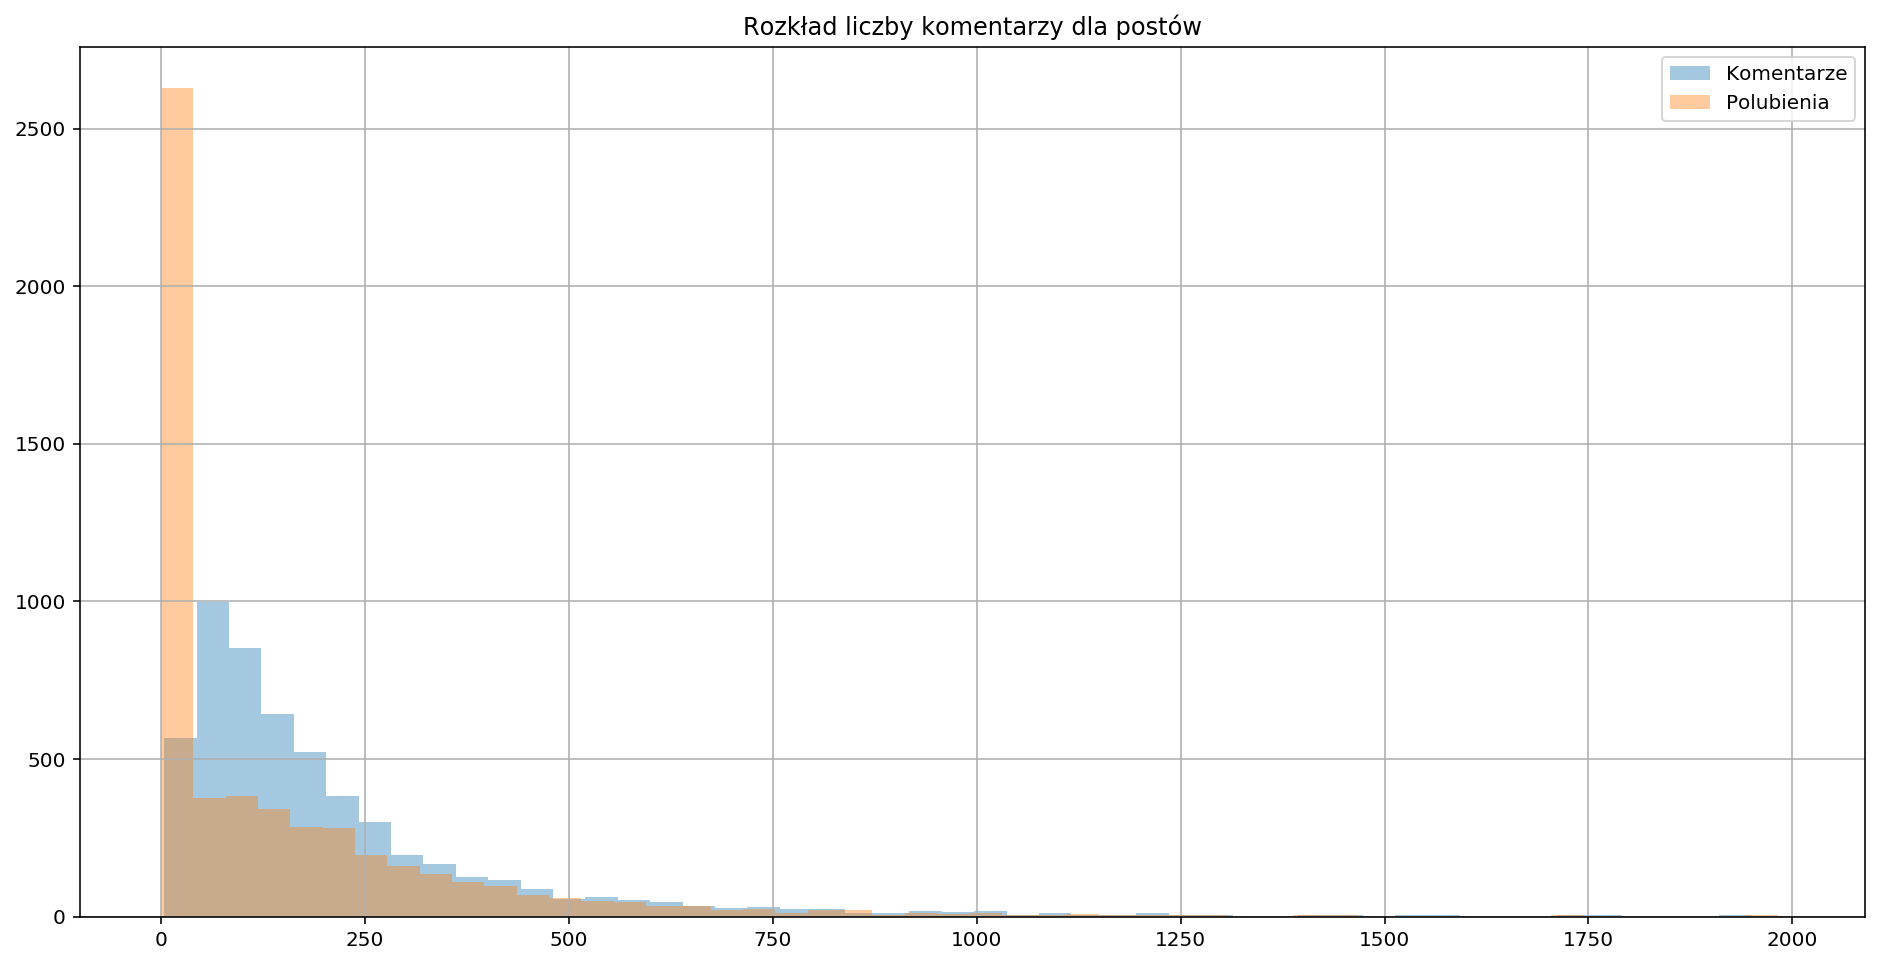

In [164]:
serie1 = df.groupby('short_code').size()
serie1 = serie1[serie1<=2000]

serie2 = df.groupby('short_code')["like_count"].sum()
serie2 = serie2[serie2<=2000]

plt.figure(figsize=(16,8))
sns.distplot( serie1.values, kde=False, label='Komentarze' )
sns.distplot( serie2.values, kde=False, label='Polubienia' )

plt.grid()
plt.legend()
plt.title('Rozk≈Çad liczby komentarzy dla post√≥w')
plt.show()

## Rozk≈Çad godzinowy komentarzy

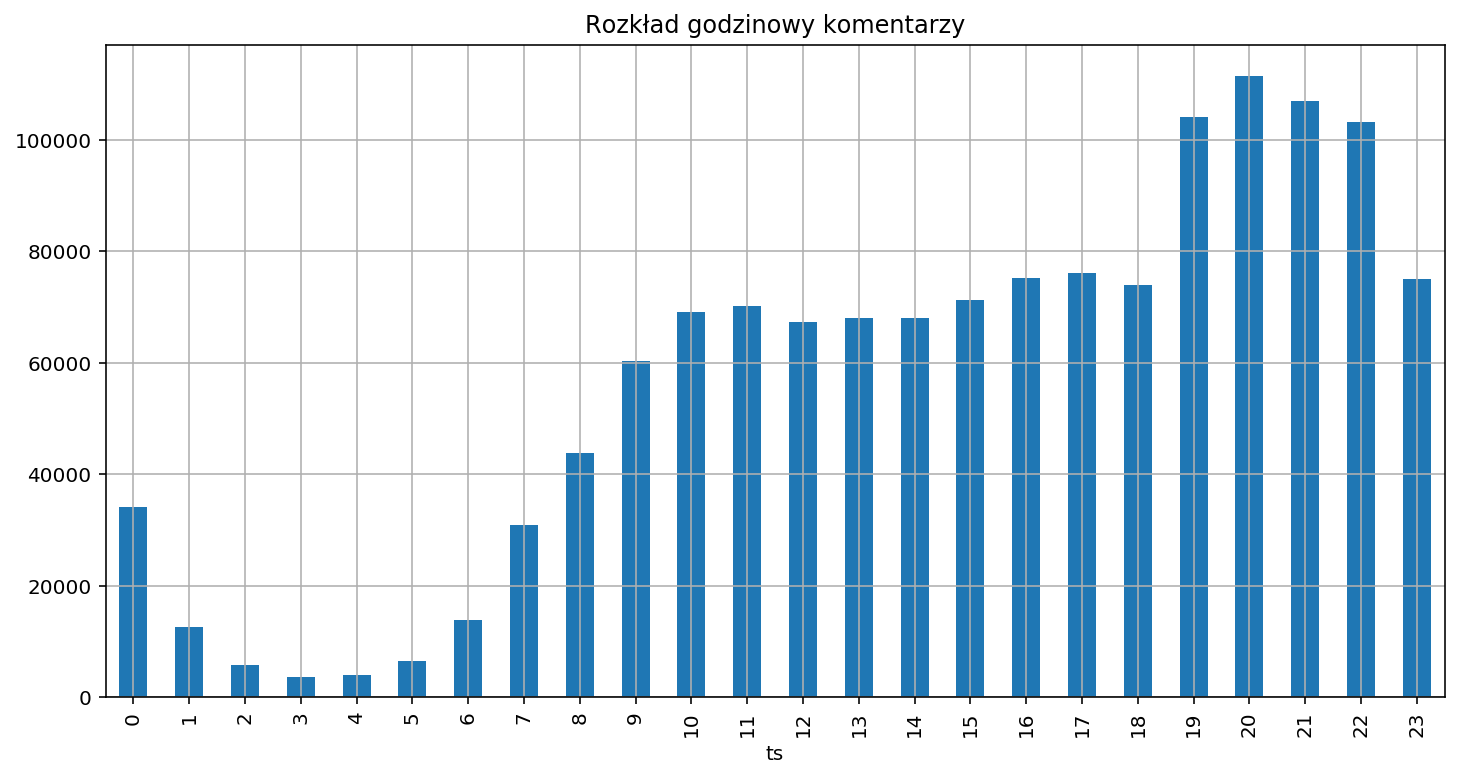

In [165]:
df.groupby(df.ts.dt.hour).size().plot(kind='bar', figsize=(12,6), grid=True)
plt.title('Rozk≈Çad godzinowy komentarzy')
plt.show()

## TOP20 komentujƒÖcych u≈ºytkownik√≥w zweryfikowanych

In [166]:
df[(df.owner_verified==True)&(df.owner!="chodakowskaewa")].groupby('owner').size().\
            sort_values(ascending=False).head(20).to_frame()

0
owner                     
ally_healthylifestyle  339
m_stylowo              328
wlodarczykpaula        325
zyjeszpl               276
juszczykmartyna        259
paulinakuczynskaa      254
aniagx_                226
szulc_nathalie         219
klaudiasynarska        213
kasia.kaczynska        210
misshulski             208
martyna_gabrych        203
p.glogosia             190
misseveo               181
goka273                179
dieta_bez_diety        174
julietmonroe           170
b_arbara84             169
lexa_wk                162
siaka93                161

## Lematyzacja tre≈õci komentarzy

In [14]:
#!pip install spacy --no-cache-dir 

In [15]:
#!python -m pip install /Users/marian/Downloads/pl_spacy_model-0.1.0.tar.gz --no-cache-dir 

In [167]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk.stem

In [168]:
nltk.download('punkt')
nltk.download('pl196x')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/marian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package pl196x to /Users/marian/nltk_data...
[nltk_data]   Package pl196x is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/marian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marian/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [169]:
import spacy
nlp = spacy.load('pl_spacy_model')

/Users/marian/opt/anaconda3/lib/python3.7/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'pl_model' (0.1.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [170]:
stops = set(nltk.corpus.stopwords.words('polish'))
lematizer = nltk.stem.WordNetLemmatizer()

def lemat_comments(s):
    cache = dict()
    result = []
    print("RegexpTokenizer")
    tokenizer = RegexpTokenizer(r'\w+')
    print("Tokenizer")
    text = tokenizer.tokenize(s.lower())
    words = nltk.word_tokenize(" ".join(text))
    print("Stopwords")
    words = [word for word in words if word not in stops and len(word)>=3]
    total = 0
    print("total=",len(words))
    for word in words:
        total+=1
        if total%1000==0:
            print(".", end='')
        
        if cache.get(word):
            token = cache.get(word)
            #print("x",end='')
            result.append(token.lemma_)
        else:
            doc = nlp(word)
            #print("+",end='')
            for token in doc:
                cache[word] = token
                result.append(token.lemma_)

    return result

In [171]:
s = " ".join(df.sample(n=5000).text.to_list())
lemats = lemat_comments(s)

RegexpTokenizer
Tokenizer
Stopwords
total= 26592
..........................

In [172]:
lemats

['ewciu',
 'piekna',
 'ewku',
 'kochany',
 'przesy≈Çaƒá',
 'si≈Ça',
 'vanesski',
 'modliƒá',
 'zaliczyƒá',
 'uwielbiaƒá',
 'kobieta',
 'pokazywaƒá',
 'cia≈Ço',
 'chocia≈º',
 'obserwowaƒá',
 'cichu',
 'cichu',
 'ca≈Çy',
 'serducho',
 'obecny',
 'obecny',
 'sko≈Ñczyƒá',
 'skalpel',
 'wyzwanie',
 'kochaƒá',
 'ewka',
 'cudowny',
 'miejsce',
 'cudoooooo',
 'ostatnio',
 'g≈Çowa',
 'top',
 'zaraz',
 'maluch',
 'zrobiƒá',
 'inhalacja',
 'daƒá',
 'lek',
 'wiosna',
 'udaƒá',
 'wstaƒá',
 'powiedzieƒá',
 'przyjemny',
 'poranek',
 'piƒôkny',
 'str√≥j',
 'happy',
 'earth',
 'day',
 'skalpel',
 'obciƒÖ≈ºenie',
 'minuta',
 'rewolucja',
 'p≈Çaski',
 'brzucho',
 'robiƒá',
 'fotka',
 'telefon',
 'why',
 'by≈Çam',
 'restauracja',
 'czƒôsto',
 'przechadzaƒá',
 'tamtƒôdy',
 'mi≈Çy',
 'dzie≈Ñ',
 'londynie',
 'przypadek',
 'osoba',
 'm√≥wiƒá',
 'daƒá',
 'rada',
 'podjƒÖƒá',
 'wyzwanie',
 'mƒÖdry',
 's≈Çowo',
 'ewka',
 'dobra',
 'styl√≥weczka',
 'ewcia',
 'super',
 'gin',
 'tonik',
 'dietetyczny',
 'matka',
 '

In [173]:
df_lemats = pd.DataFrame(lemats, columns=['word'])

In [174]:
top_words = list(df_lemats.groupby('word').size().sort_values(ascending=False).head(40).index)

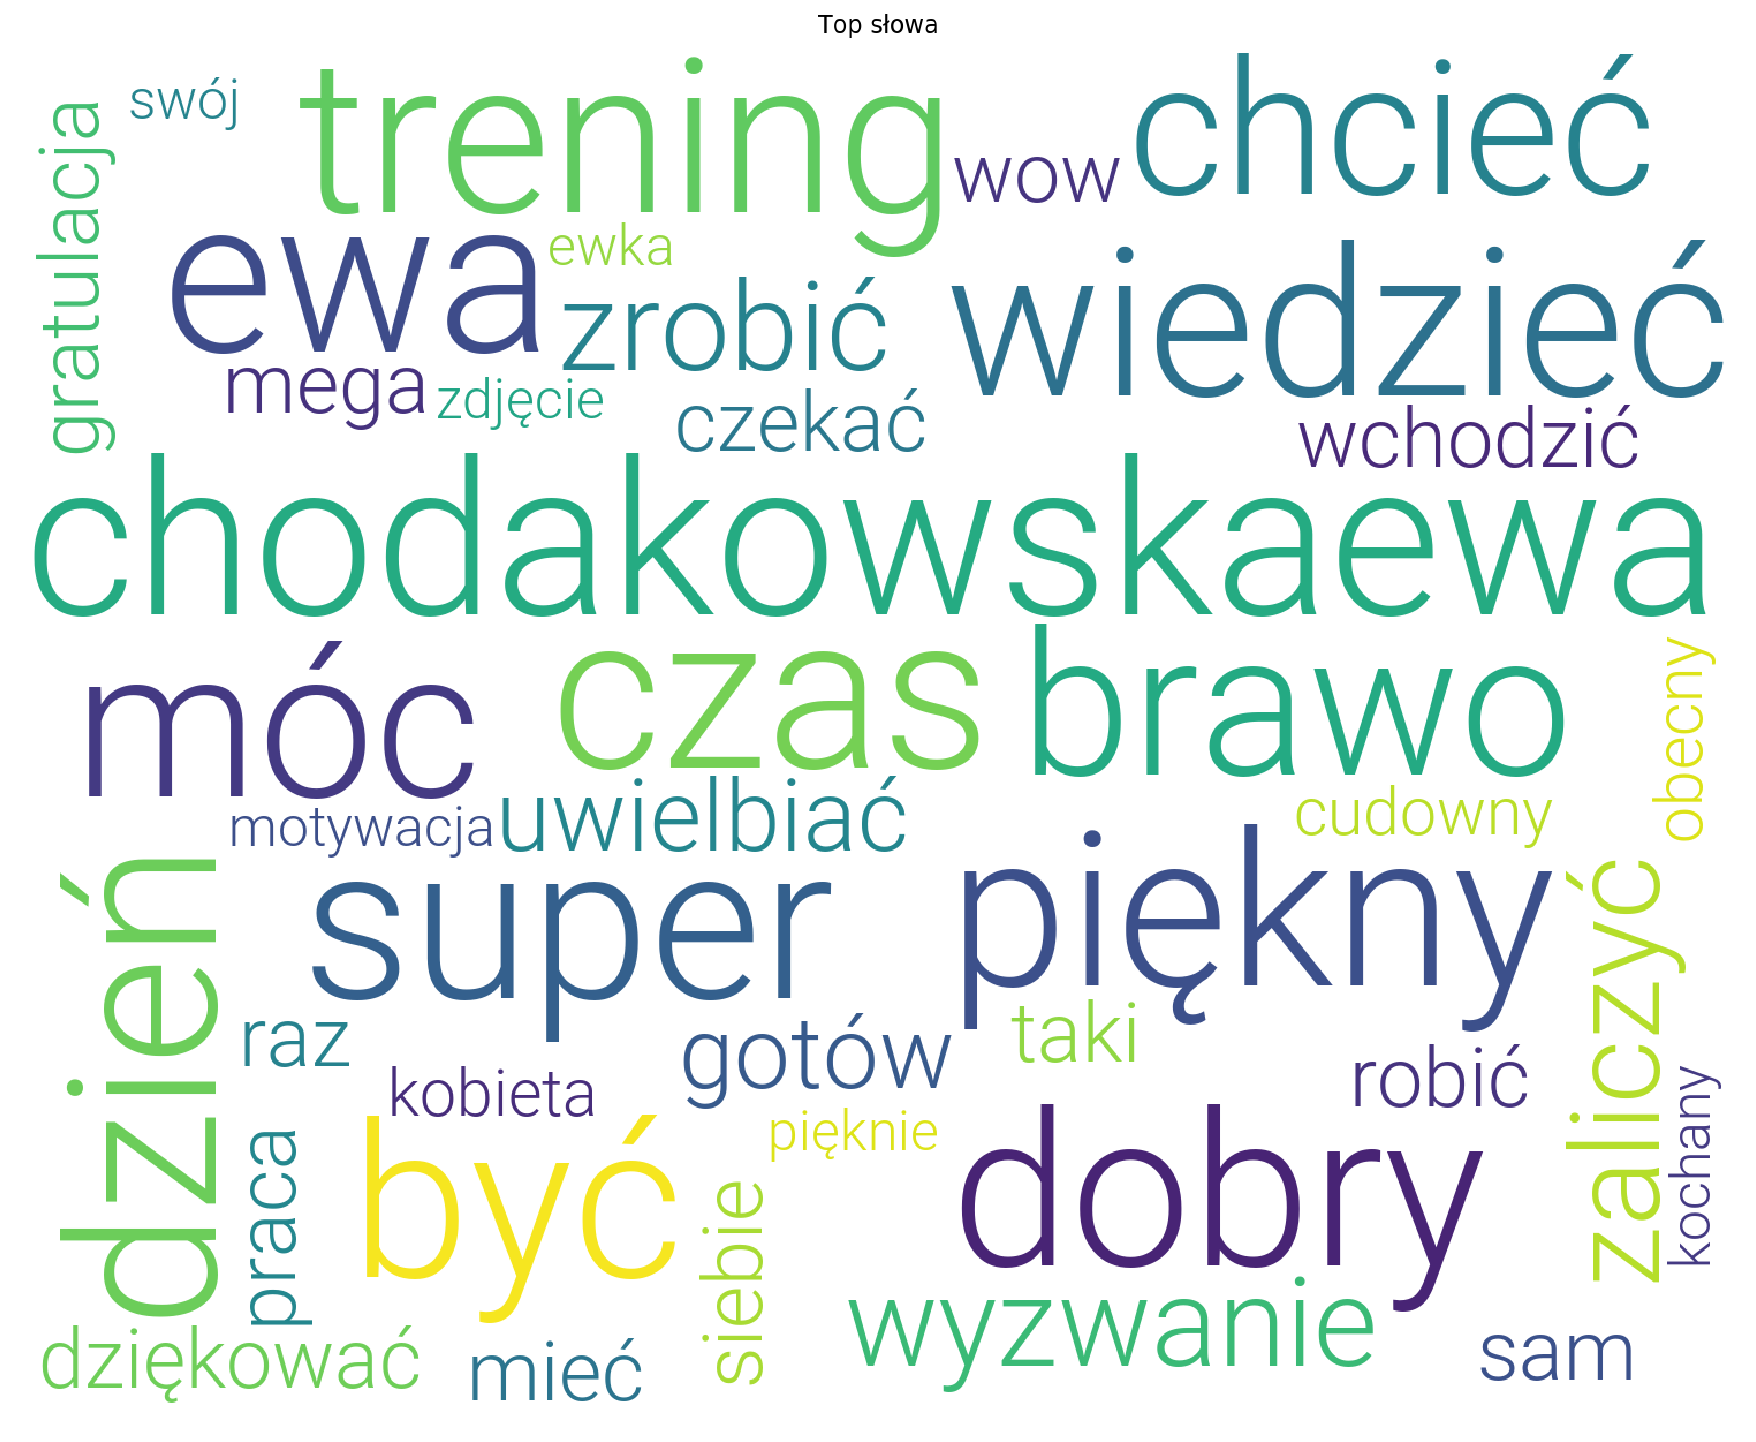

In [175]:
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', font_path='Roboto-Light.ttf', margin=10, scale=1.5,
                min_font_size = 20).generate(" ".join(top_words)) 
  
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Top s≈Çowa')

plt.show() 

## Reakcja u≈ºytkownik√≥w na publikacjƒô komentarzy (czas publikacji komentarzy po publikacji postu) 

In [176]:
df_posts = pd.read_csv("chodakowska.csv", parse_dates=['ts'], usecols=['shortcode','ts'])
df_posts.columns=['short_code','post_ts']

In [177]:
df_result = pd.merge(df, df_posts, how='left', on='short_code', indicator=True)
df_result["ts_diff"] = (df_result.ts - df_result.post_ts).astype('timedelta64[m]')
df_result = df_result[(df_result._merge=="both")&(df_result.ts_diff>0)]
df_result.sample(n=5)

short_code                 id  \
550874   BTQpdNzlc__  17855056975153621   
1200832  CAigURCnT0F  17864510839838087   
1263031  CCA1yqXHqtT  17889984409570269   
300312   B5ST4WWHFM6  17872678552507728   
275235   B4Zr9qXnybf  18110730088013970   

                                          text                  ts  \
550874                         By≈Ço cudownie ‚ù§ 2017-04-24 10:32:40   
1200832           Obecna, niech bƒôdzie üî•‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è 2020-05-23 21:13:33   
1263031                               OBECNA‚ù§Ô∏è 2020-06-29 16:09:10   
300312           Zdecydowanie na to czeka≈Çam üòç 2019-11-25 13:14:04   
275235   Biorƒô udzia≈Ç üòÅ bƒôdzie üçëjak marzenie üòÅ 2019-11-04 15:01:45   

                       owner  owner_verified  viewer_has_liked  like_count  \
550874   karolina.przewoznik           False             False           0   
1200832         fitnowe_love           False             False           0   
1263031     iza.pogroszewska           False             False           0   
300312            peach_wife           False             False           0   
275235         magda.lena_de           False             False           0   

         comments_threads   spam             post_ts _merge  ts_diff  
550874                  0  False 2017-04-24 09:42:50   both     49.0  
1200832                 0  False 2020-05-23 19:42:02   both     91.0  
1263031                 0  False 2020-06-29 10:58:18   both    310.0  
300312                  0  False 2019-11-25 12:05:45   both     68.0  
275235                  0  False 2019-11-03 12:19:29   both   1602.0

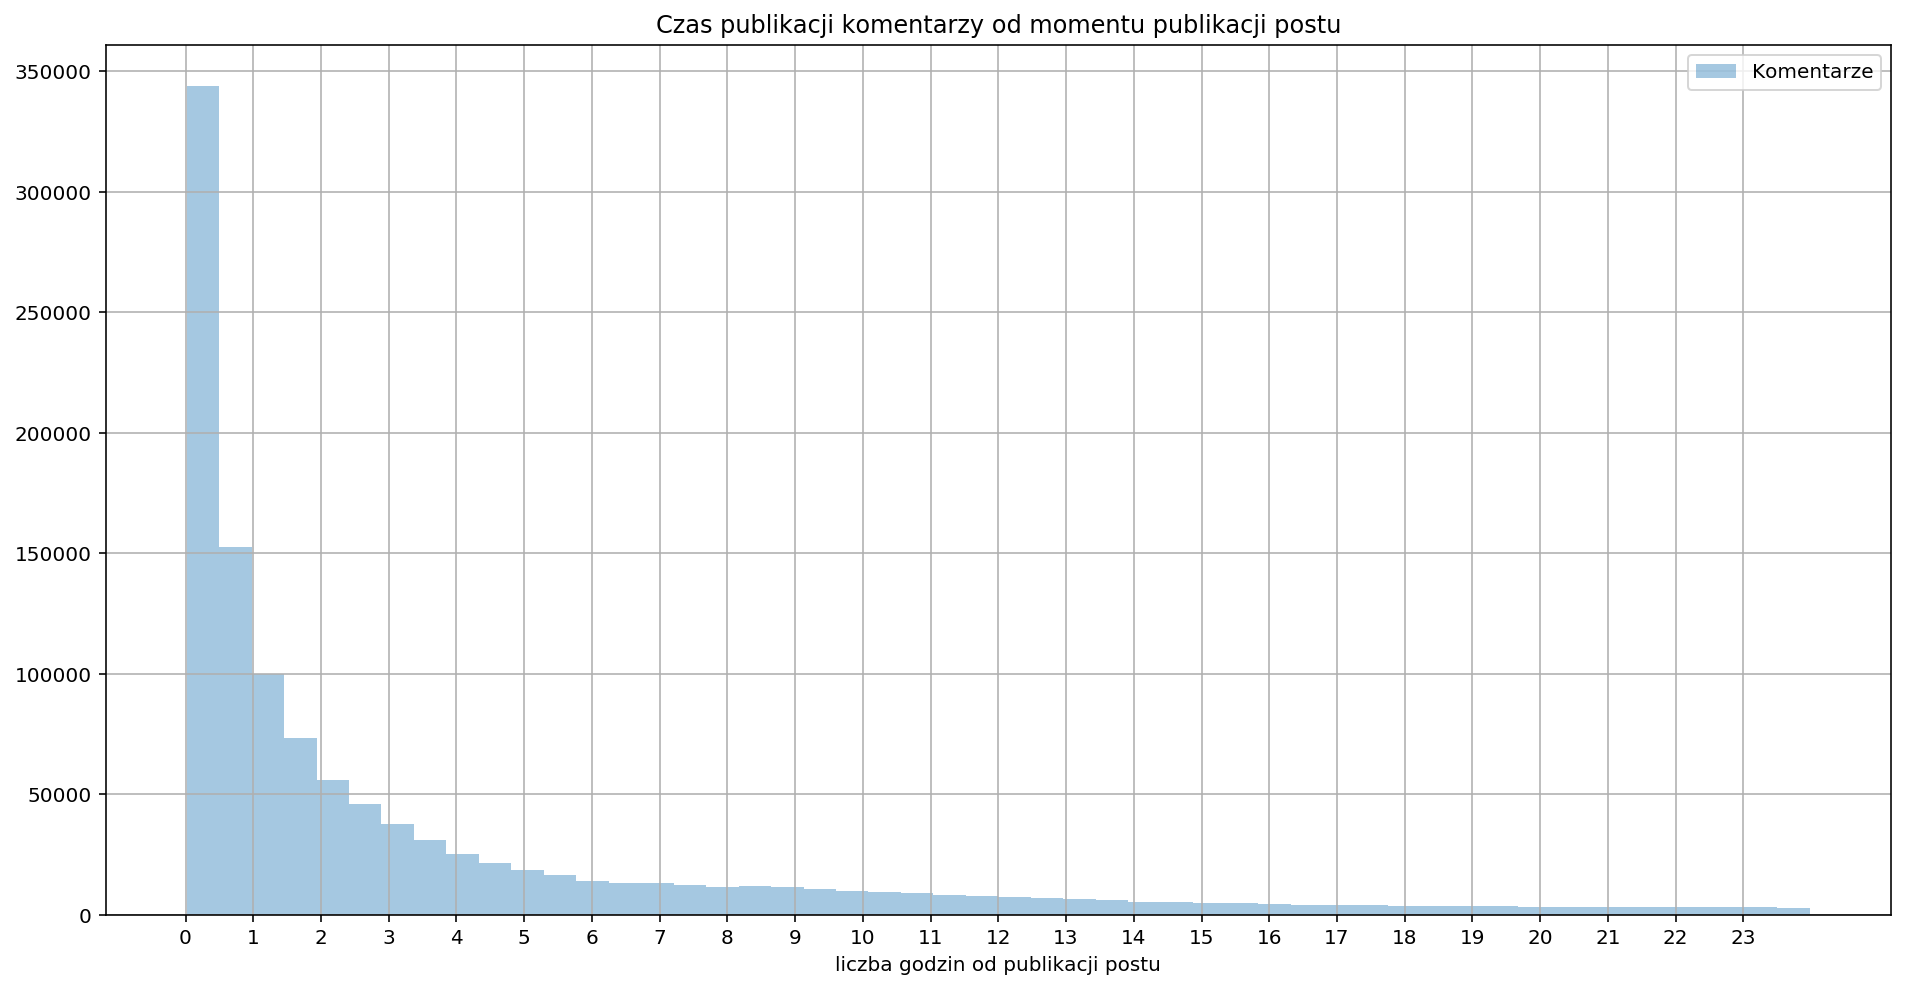

In [178]:
plt.figure(figsize=(16,8))
MAX = 60*24 # 60min*24 = 1doba
sns.distplot( df_result[df_result.ts_diff<MAX].ts_diff, kde=False, label='Komentarze' )

plt.grid()
plt.legend()
plt.title('Czas publikacji komentarzy od momentu publikacji postu')
plt.xticks(range(0,MAX,60), range(0, int(MAX/60) ))
plt.xlabel('liczba godzin od publikacji postu')
plt.show()


In [179]:
import emoji
from emosent import get_emoji_sentiment_rank

In [180]:
def extract_emojis(s):
    return [c for c in s if c in emoji.UNICODE_EMOJI]

In [181]:
def calc_emojis(s):
    emos = [c for c in s if c in emoji.UNICODE_EMOJI]
    if emos:
        result = {'negative': 0.0, 'neutral': 0.0, 'positive': 0.0, }
        for e in emos:
            try:
                sent = get_emoji_sentiment_rank(e)
                result["negative"] += sent["negative"]
                result["neutral"] += sent["neutral"]
                result["positive"] += sent["positive"]
            except:
                pass
        sum_ = sum(result.values())
        if sum_>0:
            result["negative"] /= sum_
            result["neutral"] /= sum_
            result["positive"] /= sum_
        return max(result, key=result.get)
        #return result
    else:
        return pd.np.NaN

/Users/marian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


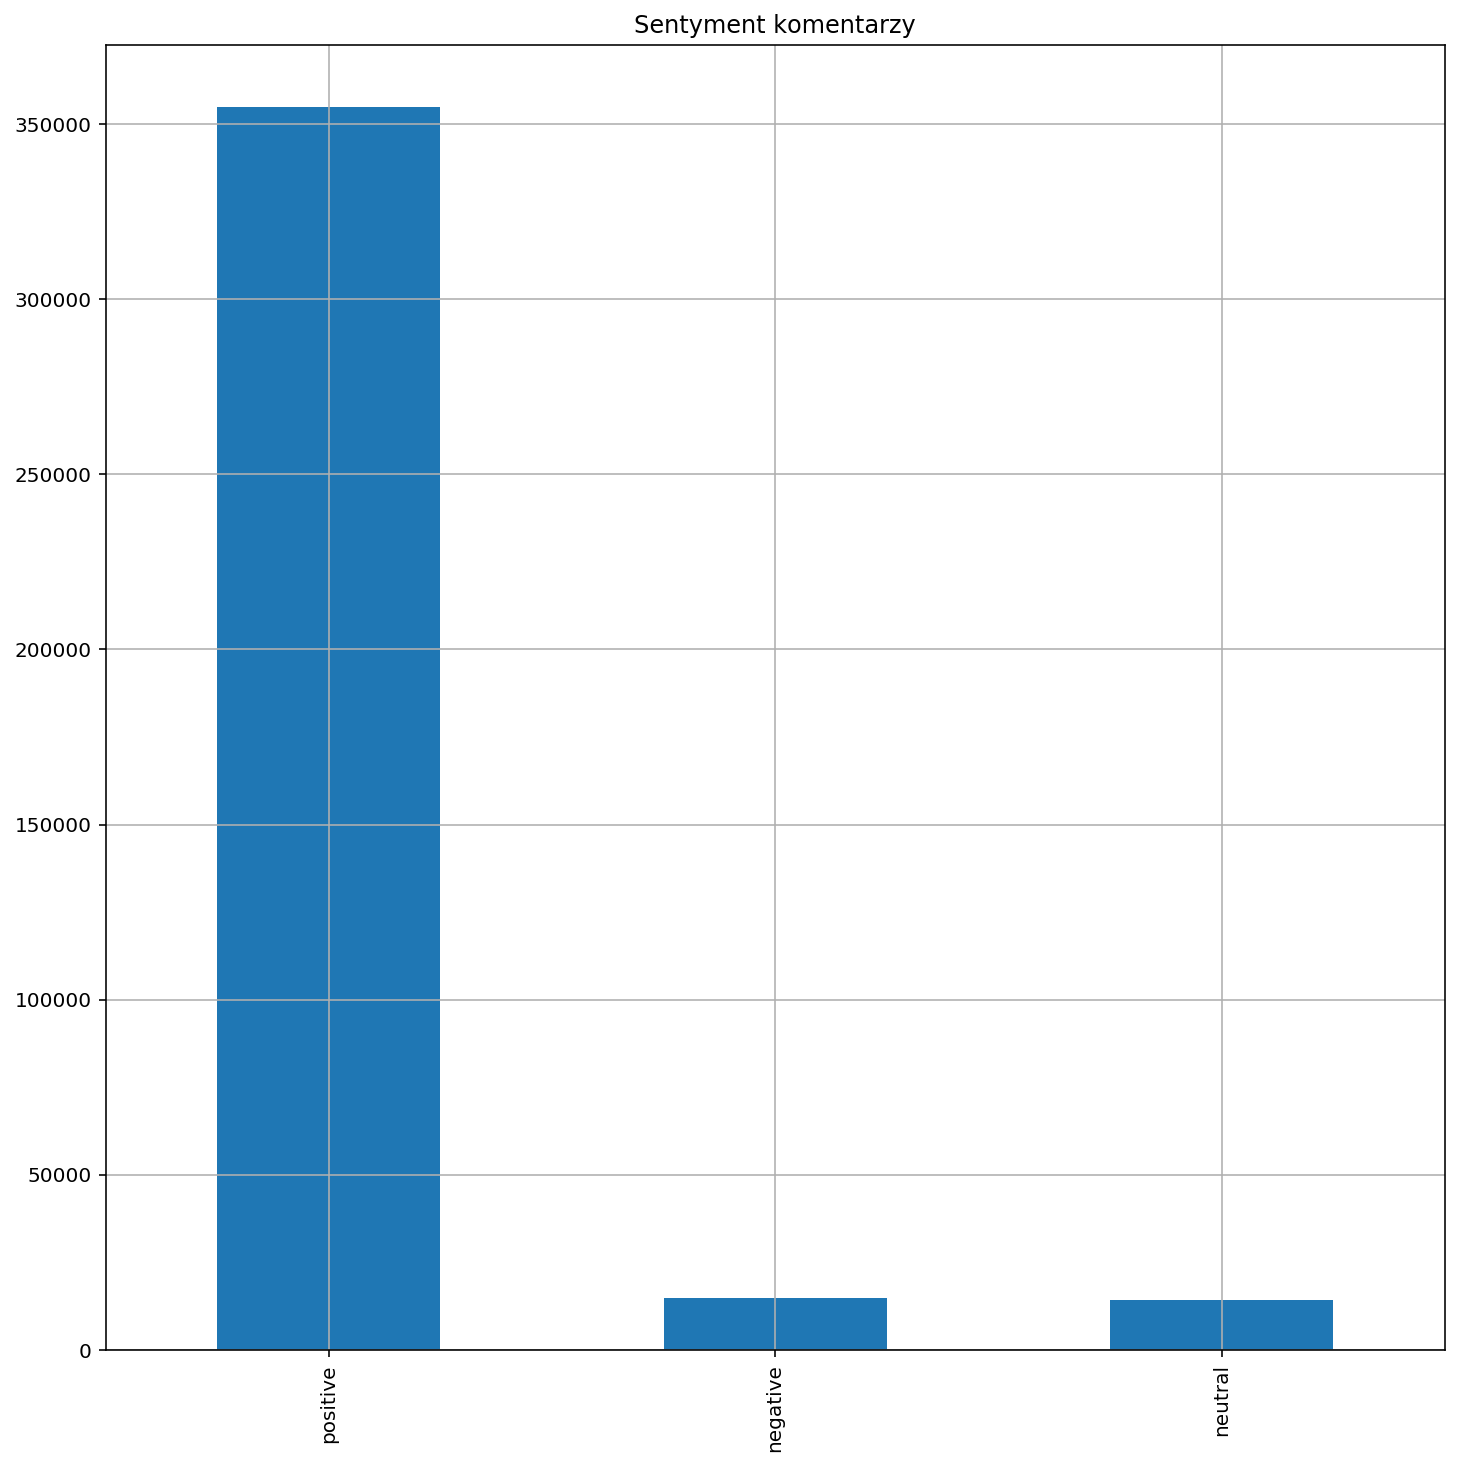

In [184]:
#df.sample(n=20).text.apply(extract_emojis)
df_tmp = df.sample(n=500000)
df_tmp["sentiment"] = df_tmp.text.apply(calc_emojis)
df_tmp.sentiment.value_counts().plot(kind='bar', grid=True, figsize=(12,12))
plt.title('Sentyment komentarzy')
plt.show()